# Exercise 8- Data Visualization

### Step 1. Import the necessary libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

### Step 2. Import the dataset from the AutoMPG dataset file. Assign it to a variable called mpg_df

In [70]:
mpg_df=pd.read_csv("auto-mpg.csv")


### Step 3. Perform basic EDA to understand the structure of the data

In [71]:
mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [72]:
mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

### Step 4. Check and handle the missing values, if any.

In [73]:
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### Step 5. Create a plot to check the relationship between horsepower and acceleration. Note down your insight for the same. Beautify the graph using various customizations.

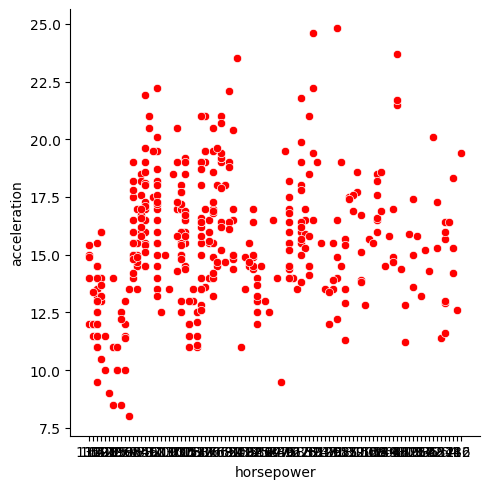

In [74]:
sns.relplot(x="horsepower",y="acceleration",data=mpg_df,color="red")
plt.show()

### Step 6: Distribution of the data

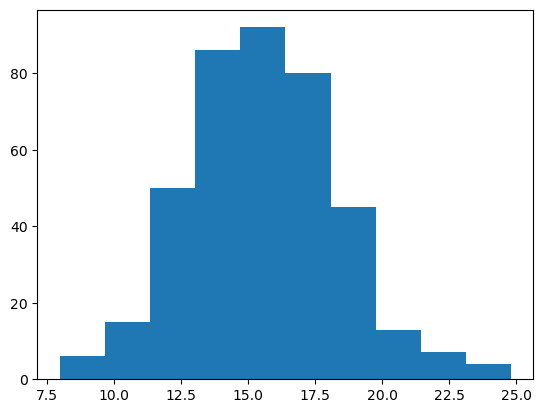

In [75]:
plt.hist(mpg_df['acceleration'])

plt.show()

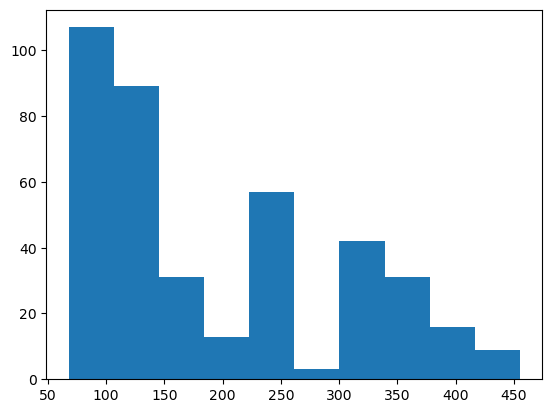

In [76]:
plt.hist(mpg_df['displacement'])
plt.show()

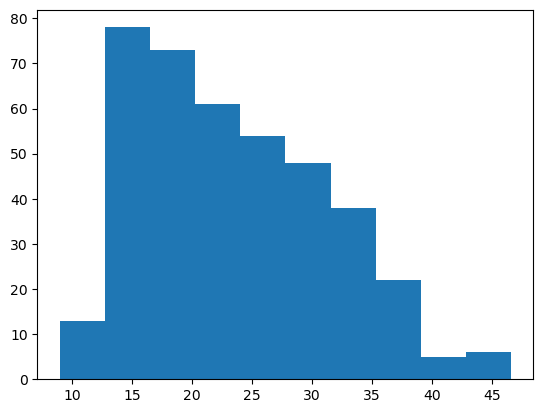

In [77]:
plt.hist(mpg_df['mpg'])
plt.show()

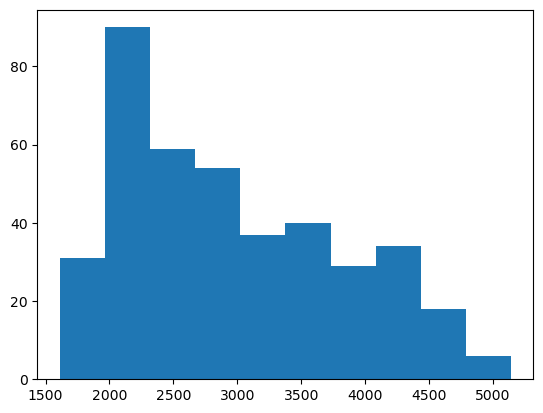

In [78]:
plt.hist(mpg_df["weight"])
plt.show()

### Step 7. Create a plot to check the relationship between displacement and weight for origin 2, color the datapoints based on no of cylinders. Note down your insight for the same and save the plot as an image file.

In [79]:
df = mpg_df[mpg_df.origin==2]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
19,26.0,4,97.0,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan
20,25.0,4,110.0,87,2672,17.5,70,2,peugeot 504
21,24.0,4,107.0,90,2430,14.5,70,2,audi 100 ls
22,25.0,4,104.0,95,2375,17.5,70,2,saab 99e
23,26.0,4,121.0,113,2234,12.5,70,2,bmw 2002
...,...,...,...,...,...,...,...,...,...
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
359,28.1,4,141.0,80,3230,20.4,81,2,peugeot 505s turbo diesel
360,30.7,6,145.0,76,3160,19.6,81,2,volvo diesel
375,36.0,4,105.0,74,1980,15.3,82,2,volkswagen rabbit l


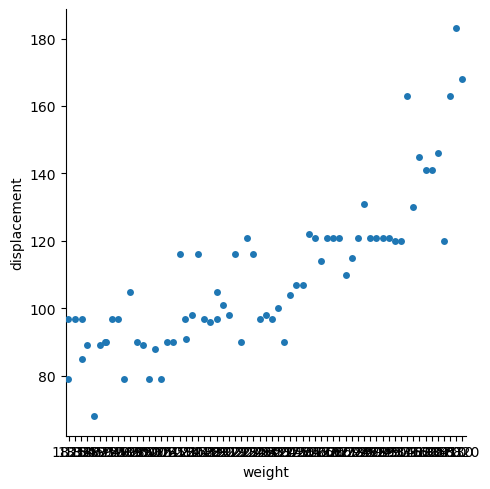

In [80]:
sns.catplot(x='weight', y='displacement', data = df)


### Step 8. Display the frequency distribution of the Origin variable. Note down your insight for the same

(array([249.,   0.,   0.,   0.,   0.,  70.,   0.,   0.,   0.,  79.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

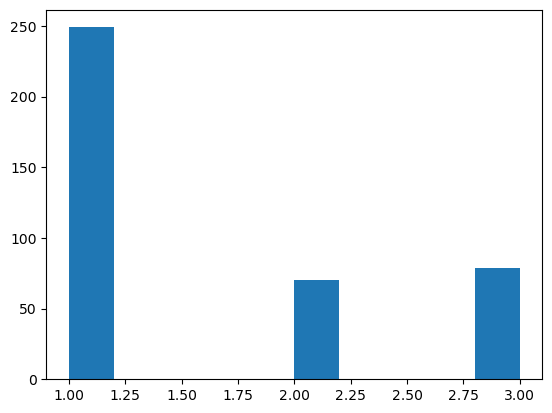

In [81]:
plt.hist(mpg_df['origin'])

### Step 9. Check the relationship of multiple variables wrt mpg. Note down your insight for the same

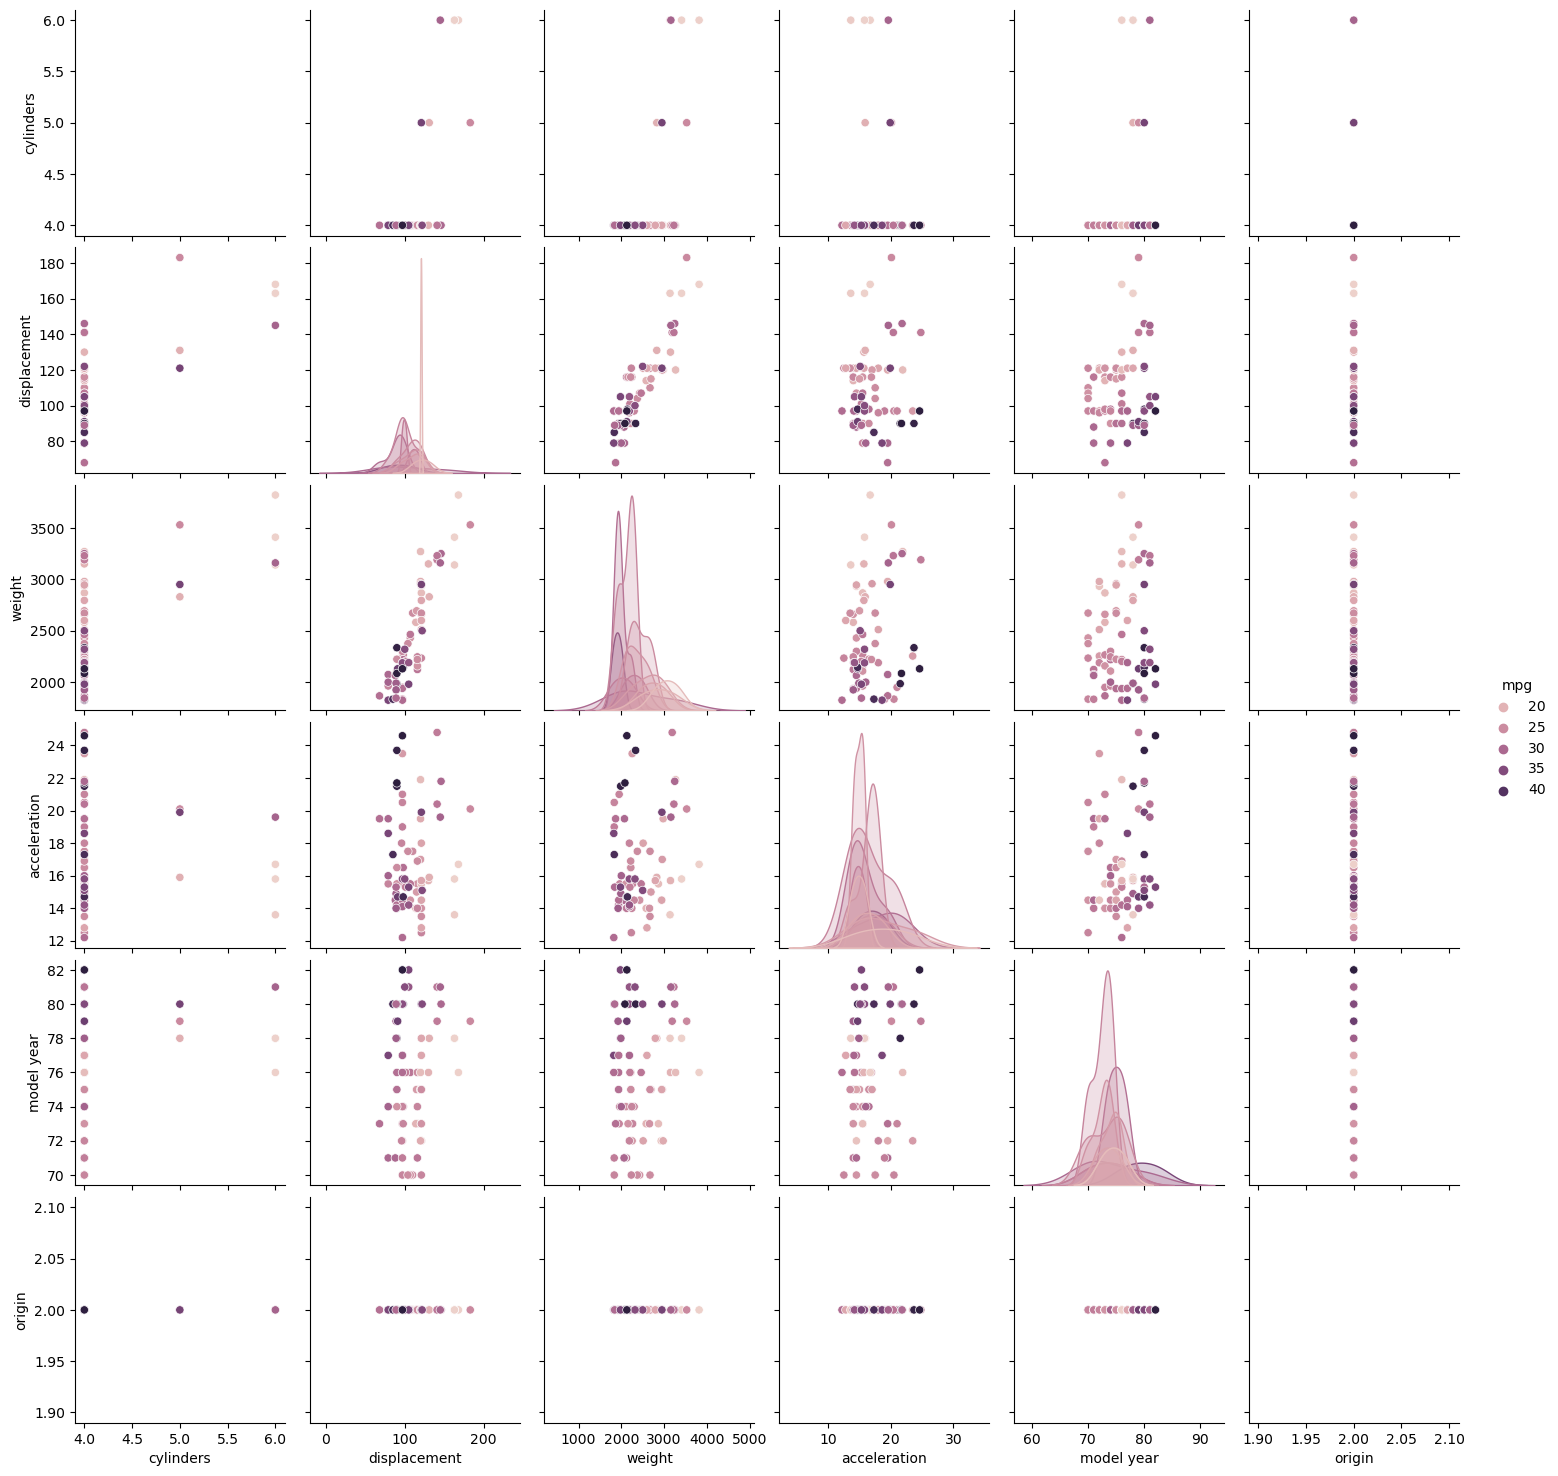

In [82]:
sns.pairplot(data=df,hue="mpg")

### Step 10. Display the average weight based on no of cylinders present. Note down the insight for the same

In [83]:
arr_cyl=mpg_df.groupby('cylinders')['weight'].sum()
arr_cyl_avg=arr_cyl/398
arr_cyl_avg

cylinders
3      24.105528
4    1183.060302
5      23.391960
6     675.002513
8    1064.864322
Name: weight, dtype: float64

In [84]:
mpg_df.groupby('cylinders').weight.mean()

cylinders
3    2398.500000
4    2308.127451
5    3103.333333
6    3198.226190
8    4114.718447
Name: weight, dtype: float64

### Step 11. Check for the outliers in the dataset. Note down the insight for the same.

<Axes: >

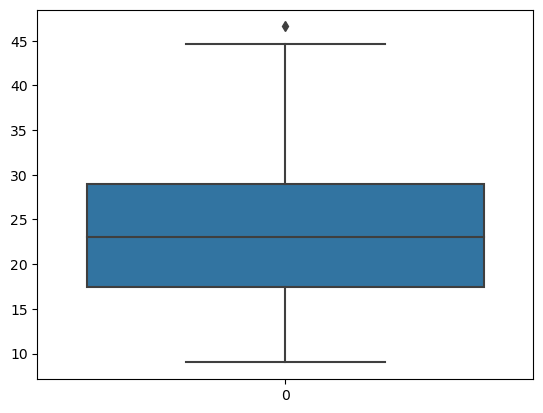

In [85]:
sns.boxplot(mpg_df['mpg'])

<Axes: >

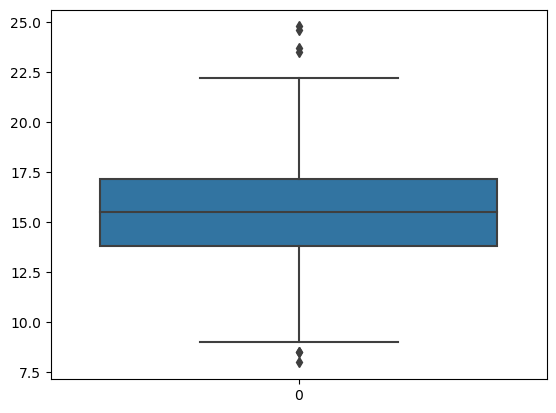

In [86]:
sns.boxplot(mpg_df['acceleration'])

<Axes: >

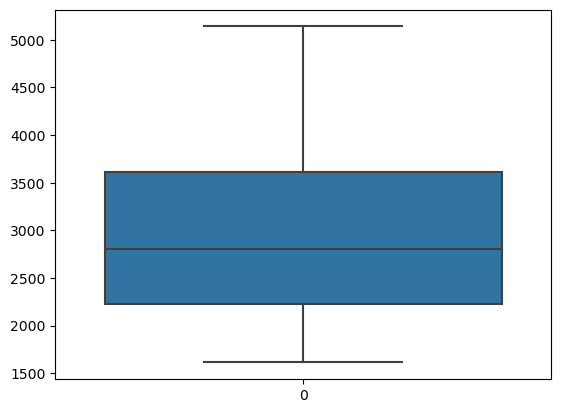

In [87]:
sns.boxplot(mpg_df['weight'])

<Axes: >

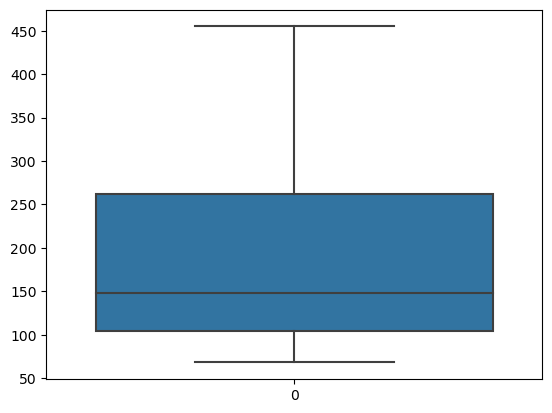

In [88]:
sns.boxplot(mpg_df['displacement'])

<Axes: >

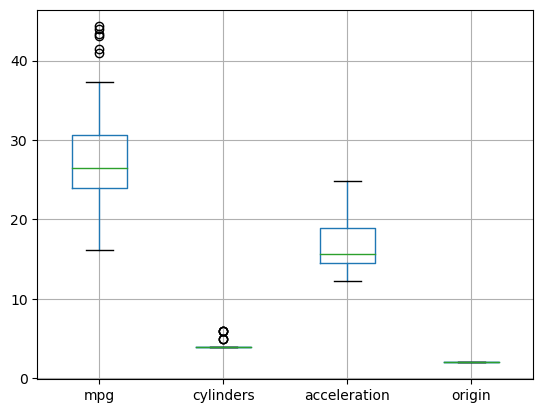

In [89]:
df.drop(["weight","displacement","model year"],axis=1).boxplot()

### Step 12. Plot the correlations for variables.

In [90]:
import warnings
warnings.filterwarnings("ignore")

In [91]:
mpg_df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000
